<a href="https://colab.research.google.com/github/Anjalin01/ML_Sentiment_Analysis/blob/main/Verzeo_Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Streamlit webapp for sentiment analysis using the joblib model (pipeline model)<br>**
Anjalin Anna Cherian

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import nltk 
import string 
import seaborn as sns   
from sklearn import metrics 
pd.options.mode.chained_assignment = None 

Creating the dataframe


In [2]:
df= pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Data processing and visualisation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(1000, 2)

In [6]:
df = df.drop_duplicates(keep = 'last')

In [7]:
df.shape

(996, 2)

In [8]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

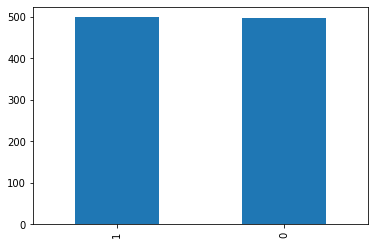

In [9]:
df['Liked'].value_counts().plot(kind='bar')

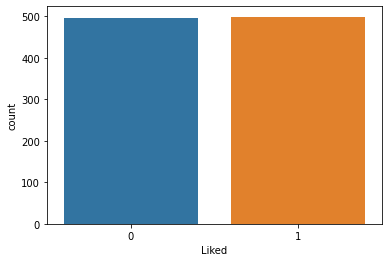

In [10]:
sns.countplot(x=df.Liked)

In [11]:
# # To convert the text to string
df['Review'] = df['Review'].astype('str')

# # To covert the text to lowercase
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df


,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone.,0
997,overall i was not impressed and would not go b...,0
998,"the whole experience was underwhelming, and i ...",0


In [12]:
# To Remove Punctuation
import string
punctuation = string.punctuation
df['Review'] = df['Review'].str.replace('[{}]'.format(string.punctuation),' ',regex=True)
df


,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone,0
997,overall i was not impressed and would not go b...,0
998,the whole experience was underwhelming and i ...,0


In [13]:
x = df['Review'].values
y = df['Liked'].values

In [14]:
x

array(['wow    loved this place ', 'crust is not good ',
       'not tasty and the texture was just nasty ',
       'stopped by during the late may bank holiday off rick steve recommendation and loved it ',
       'the selection on the menu was great and so were the prices ',
       'now i am getting angry and i want my damn pho ',
       'honeslty it didn t taste that fresh  ',
       'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ',
       'the fries were great too ', 'a great touch ',
       'service was very prompt ', 'would not go back ',
       'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced ',
       'i tried the cape cod ravoli  chicken  with cranberry   mmmm ',
       'i was disgusted because i was pretty sure that was human hair ',
       'i was shocked because no signs indicate cash only ',
       'highly recommended ', 'waitress was a little slow in service '

In [15]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [16]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [17]:
x_train.shape

(747,)

In [18]:
x_test.shape

(249,)

In [19]:
y_train.shape

(747,)

In [20]:
y_test.shape

(249,)

### METHOD 1
Count vectoriser

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [22]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

Svc model

In [23]:
from sklearn.svm import SVC #from support vector machines import support vector classifier
model1 = SVC()
model1.fit(x_train_vect,y_train)

SVC()

In [24]:
y_pred1= model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [25]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred1,y_test)

0.7269076305220884

### Method 2

Pipelining (SVC + countvectorizer )

In [26]:
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [27]:
accuracy_score(y_pred2,y_test)

0.8152610441767069

### Method 3
Naive Bayes model

In [28]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [29]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [30]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [31]:
accuracy_score(y_pred3,y_test)

0.7469879518072289

Pipelining (Naive Bayes + countvectorizer )

In [32]:
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [33]:
accuracy_score(y_pred4,y_test)

0.7791164658634538

Using joblib

In [34]:
# We have the best accuracy for model 2-Pipeline (SVC + countvectorizer )

In [35]:
import joblib 
joblib.dump(model2,'Restaurant_reviews')

['Restaurant_reviews']

In [36]:
import joblib
reload_model = joblib.load('Restaurant_reviews')

Using our model to predict the output of new reviews

In [37]:
reload_model.predict(["good food"])

array([1])

In [38]:
reload_model.predict(["bad food"])

array([0])

In [39]:
reload_model.predict(["The ambience and the food was insanely good"])

array([1])

In [40]:
reload_model.predict(["unprofessional servers and extremely poor service"])

array([0])

Creating a streamlit webapp for sentiment analysis

In [41]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet 

     |████████████████████████████████| 9.1 MB 8.7 MB/s 
     |████████████████████████████████| 235 kB 58.9 MB/s 
     |████████████████████████████████| 181 kB 66.0 MB/s 
     |████████████████████████████████| 164 kB 78.6 MB/s 
     |████████████████████████████████| 78 kB 8.8 MB/s 
     |████████████████████████████████| 4.3 MB 54.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 132 kB 63.6 MB/s 
     |████████████████████████████████| 423 kB 54.4 MB/s 
     |████████████████████████████████| 793 kB 64.1 MB/s 
     |████████████████████████████████| 132 kB 64.9 MB/s 
     |████████████████████████████████| 381 kB 67.2 MB/s 
     |████████████████████████████████| 51 kB 7.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which i

In [42]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("SENTIMENT ANALYSIS")
reload_model = joblib.load('Restaurant_reviews')

ip = st.text_input("Enter the review to be analysed :")
op = reload_model.predict([ip])
 
if st.button('PREDICT'):
  st.title(op[0])

Writing app.py


In [ ]:
#to run this streamlit web application 
!streamlit run app.py & npx localtunnel --port 8501
# external link using port forwarding service of localtunnel is used

2022-07-31 18:17:25.678 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.247.23.145:8501

npx: installed 22 in 4.249s
your url is: http://clear-pears-stay-35-247-23-145.loca.lt
